# Plotting Scala data with Matplotlib (More idiomatically)


Here's an example showing how to take data generated in Scala and plotting it with Matplotlib. 

The data-generation code in Scala is written more idiomatically than the code in the [Plotting Scala data with Matplotlib example](https://github.com/polynote/polynote/blob/master/docs/examples/Plotting%20Scala%20data%20with%20Matplotlib.ipynb), at the expense of having to do (a bit) more work in Python to be able to use it.


Here's the data generation:




In [1]:
case class Point(x: Double, y: Double, color: String)
val colors = Seq("red", "green", "blue")
val n = 750
val idiomaticData = for {
    color <- colors
    n     <- (0 to n)
} yield Point(Math.random(), Math.random(), color)

Now, we'll do some data preparation to get the Scala data in a format we can plot with `matplotlib`. 

In [3]:
data = []
for idx in range(0, idiomaticData.length()):
    point = idiomaticData.apply(idx)
    data.append([point.x(), point.y(), point.color()])

data

[[0.8768817563655382, 0.6024507503626798, 'red'], [0.9565236520716693, 0.32427813654323145, 'red'], [0.7466390903321652, 0.691312536598566, 'red'], [0.3836486238305522, 0.5598185490363573, 'red'], [0.6296368743034967, 0.29564425680021666, 'red'], [0.7600…

In [4]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data=data, columns=['x', 'y', 'color'])

# add the random scale column in Python
df['scale'] = np.random.uniform(1, 200, df.shape[0])

print(df.head())

          x         y color       scale
0  0.876882  0.602451   red   62.993888
1  0.956524  0.324278   red   69.219122
2  0.746639  0.691313   red  172.941312
3  0.383649  0.559819   red   81.418369
4  0.629637  0.295644   red   80.233726


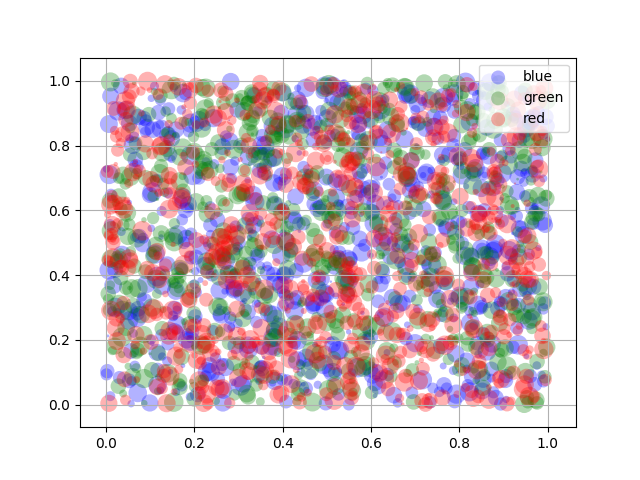

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

groups = df.groupby("color")
for name, group in groups:
    ax.scatter(group.x, group.y, c=group.color, s=group.scale, label=name,
               alpha=0.3, edgecolors='none')

ax.legend(loc="upper right")
ax.grid(True)

plt.show()